# Baseline Modelle

In [36]:
#Laden der benötigten Bibliotheken
import pandas as pd
import numpy as np
import nltk   #Natural Language ToolKit
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Daten einlesen


In [37]:
data = pd.read_csv("D:/NLPCourse/df_wirtschaft_labeled.csv")

In [38]:
data.head()

,Unnamed: 0,title,label_title,body,label_body,body_512
0,0,Corona-Gutscheine können bald eingelöst werden,1,Für abgesagte oder verschobene Konzerte und Re...,-1,Für abgesagte oder verschobene Konzerte und Re...
1,1,Strom und Gas: Grundversorger müssen Billiganb...,-1,Auf einen Schlag 20.000 neue Gaskunden: Weil B...,-1,Auf einen Schlag 20.000 neue Gaskunden: Weil B...
2,2,Atomenergie: Deutschland protestiert gegen EU-...,0,"Nur in Deutschland, Österreich und Luxemburg h...",-1,"Nur in Deutschland, Österreich und Luxemburg h..."
3,3,Auf Firmen und Verbraucher kommt noch mehr Inf...,-1,In den gestressten Unternehmen stauen sich wei...,-1,In den gestressten Unternehmen stauen sich wei...
4,4,Rückruf von 850.000 Autos: Mercedes warnt vor ...,-1,Mercedes ruft Hunderttausende Diesel zurück in...,-1,Mercedes ruft Hunderttausende Diesel zurück in...


In [39]:
data2 = pd.read_csv("D:/NLPCourse/df_wirtschaft.csv")

In [40]:
date = data2["date_publish"]

In [41]:
data["date"] = date

## Pre-Processing

In [42]:
#lower case
data["preproc"] = data["body"].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

In [43]:
#html tags und urls raus
from bs4 import BeautifulSoup
data["preproc"]=data["preproc"].apply(lambda x: BeautifulSoup(x).get_text())
import re
data["preproc"]=data["preproc"].apply(lambda x: re.sub(r"http\S+", "", x))

In [44]:
#kontrahieren: don't -> do not etc.
#def contractions(s):
# s = re.sub(r"won’t", "will not",s)
# s = re.sub(r"would’t", "would not",s)
# s = re.sub(r"could’t", "could not",s)
# s = re.sub(r"\’d", " would",s)
# s = re.sub(r"can\’t", "can not",s)
# s = re.sub(r"n\’t", " not", s)
# s= re.sub(r"\’re", " are", s)
# s = re.sub(r"\’s", " is", s)
# s = re.sub(r"\’ll", " will", s)
# s = re.sub(r"\’t", " not", s)
# s = re.sub(r"\’ve", " have", s)
# s = re.sub(r"\’m", " am", s)
# return s
#data["tweets_preproc"]=data["tweets_preproc"].apply(lambda x:contractions(x))

In [45]:
#überschüssige leerzeichen raus
data["preproc"]=data["preproc"].apply(lambda x: re.sub(' +', ' ', x))

In [46]:
#fehlende Ressourcen downloaden
nltk.download('stopwords')
#stopwords raus
from nltk.corpus import stopwords
stop = stopwords.words('german')
data["preproc"]=data["preproc"].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jonas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
#stemming
#nltk.download('wordnet')
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("german")
#lemmatizer = WordNetLemmatizer()
data["preproc"]=data["preproc"].apply(lambda x: " ".join([stemmer.stem(w) for w in nltk.word_tokenize(x)]))

In [48]:
data["preproc_vader"] = data["preproc"]

In [49]:
#sonderzeichen etc. raus
#Ressourcen downloaden
#nltk.download('punkt')
#sonderzeichen etc. raus
data["preproc"]=data["preproc"].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

In [50]:
#Datumsvariable erstellen - um ggf. spaeter Ergebnisse zu plotten
data["date"] = pd.to_datetime(data.date, format='%Y-%m-%d %H:%M:%S')
data['date'] = data['date'].dt.strftime('%m/%d/%Y')

In [51]:
#Prüfen, ob alles geklappt hat
data.head()

,Unnamed: 0,title,label_title,body,label_body,body_512,date,preproc,preproc_vader
0,0,Corona-Gutscheine können bald eingelöst werden,1,Für abgesagte oder verschobene Konzerte und Re...,-1,Für abgesagte oder verschobene Konzerte und Re...,12/20/2021,abgesagt verschob konzert reis gab gutschein c...,abgesagt verschob konzert reis gab gutschein c...
1,1,Strom und Gas: Grundversorger müssen Billiganb...,-1,Auf einen Schlag 20.000 neue Gaskunden: Weil B...,-1,Auf einen Schlag 20.000 neue Gaskunden: Weil B...,12/23/2021,schlag neu gaskund billiganbiet lief konn m...,schlag 20.000 neu gaskund : billiganbiet lief ...
2,2,Atomenergie: Deutschland protestiert gegen EU-...,0,"Nur in Deutschland, Österreich und Luxemburg h...",-1,"Nur in Deutschland, Österreich und Luxemburg h...",01/03/2022,deutschland osterreich luxemburg vorschlag eu...,"deutschland , osterreich luxemburg vorschlag e..."
3,3,Auf Firmen und Verbraucher kommt noch mehr Inf...,-1,In den gestressten Unternehmen stauen sich wei...,-1,In den gestressten Unternehmen stauen sich wei...,12/25/2021,gestresst unternehm stau weit preissteiger ba...,gestresst unternehm stau weit preissteiger . b...
4,4,Rückruf von 850.000 Autos: Mercedes warnt vor ...,-1,Mercedes ruft Hunderttausende Diesel zurück in...,-1,Mercedes ruft Hunderttausende Diesel zurück in...,01/05/2022,merced ruft hunderttaus diesel zuruck werkstat...,merced ruft hunderttaus diesel zuruck werkstat...


## Sentiment Analysis

### 1 - VADER

Vorteile:
- Braucht kein Training
- Funktioniert ohne gelabelte Daten
- speziell für Social Media (unterscheidet z.B. TOLL - toll - toll!)

Nachteile:
- Liefert teilweise keine optimalen Ergebnisse
- Hat drei Klassen (neg/neutr/pos), Tweets haben nur zwei

In [52]:
#download vader lexikon (scheint in nltk zu fehlen (vllt. auch Problem mit anderem vader?))
#nltk.download('vader_lexicon')
#nltk vader
sid = SentimentIntensityAnalyzer()
#model
data["v_scores"] = data["preproc_vader"].apply(lambda body: sid.polarity_scores(body))

In [53]:
#eigene Spalte für scores erstellen
data['compound']  = data['v_scores'].apply(lambda score_dict: score_dict['compound'])

In [54]:
#Predictions
data['v_sentiment'] = (
    np.where(
        data['compound'] >= 0.05,1,
        np.where(data['compound'] <= -0.05, -1, 0)))

In [55]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm_vader = confusion_matrix(data["label_body"], data["v_sentiment"])

[Text(0, 0.5, 'positive'), Text(0, 1.5, 'neutral'), Text(0, 2.5, 'negative')]

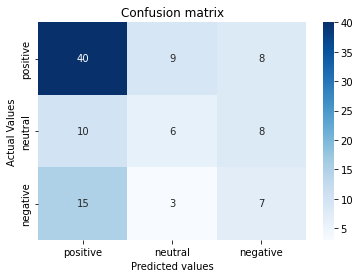

In [56]:
import seaborn as sns
ax = sns.heatmap(cm_vader, annot=True, cmap = 'Blues')
ax.set_title('Confusion matrix')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['positive','neutral','negative'])
ax.yaxis.set_ticklabels(['positive','neutral','negative'])

### 2 - TF - IDF

Term-frequency - inverse document-frequency: $tf-idf(t,d) = tf(t,d) * idf(t)$ </br>
tf = Anzahl eines Wortes $t$ in einem Tweet/Dokument </br>
$idf(t) = log\frac{n}{1+df(t)}$ (sklearn weicht leicht von Standardformulierung ab)</br>
mit $n$ = Anzahl aller Tweets im Datensatz, $df(t)$ = Anzahl aller Tweets, die Wort $t$ enthalten. </br>
Tf-idf wird zusätzlich normalisiert: </br>
$v_{norm} = \frac{v}{||v||_{2}} = \frac{v}{\sqrt{v_{1}² + v_{2}² + ... + v_{n}²}}$ </br>

In [57]:
#train / test split mit gleichen Anteilen der Klassen in Trainings- und Testdaten
from sklearn.model_selection import train_test_split
baseline_train,baseline_test = train_test_split(data,
                                                  stratify = data["label_body"],
                                                  test_size=0.25, random_state=42)
print("Training Set: ",baseline_train.shape, "Test Set: ",baseline_test.shape)

Training Set:  (79, 12) Test Set:  (27, 12)


In [58]:
baseline_test["label_body"].value_counts()

-1    15
 0     6
 1     6
Name: label_body, dtype: int64

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    analyzer="word", max_df=0.3, min_df=10, ngram_range=(1, 2), norm="l2"
)
vectorizer.fit(baseline_train["preproc"])
#Anwendung auf Training- und Testdaten
tf_x_train = vectorizer.transform(baseline_train["preproc"])
tf_x_test = vectorizer.transform(baseline_test["preproc"])

In [60]:
tf_x_train

<79x154 sparse matrix of type '<class 'numpy.float64'>'
	with 2115 stored elements in Compressed Sparse Row format>

In [61]:
#pd.DataFrame.sparse.from_spmatrix(tf_x_train)

In [62]:
tf_x_test

<27x154 sparse matrix of type '<class 'numpy.float64'>'
	with 674 stored elements in Compressed Sparse Row format>

In [63]:
#SVM classifier
#ohne grid search
from sklearn import svm
svm = svm.SVC()

In [64]:
#fitten
svm.fit(tf_x_train, baseline_train["label_body"])

SVC()

In [65]:
#predictions
y_fit_svm_base = svm.predict(tf_x_test)

In [66]:
#ergebnisse /modellgüte
from sklearn.metrics import classification_report
svm_results_base = classification_report(baseline_test["label_body"], y_fit_svm_base, output_dict = True)

C:\Anaconda3\envs\NLPCourse\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\envs\NLPCourse\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\envs\NLPCourse\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
svm_results_base

{'-1': {'precision': 0.5555555555555556,
  'recall': 1.0,
  'f1-score': 0.7142857142857143,
  'support': 15},
 '0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6},
 'accuracy': 0.5555555555555556,
 'macro avg': {'precision': 0.1851851851851852,
  'recall': 0.3333333333333333,
  'f1-score': 0.2380952380952381,
  'support': 27},
 'weighted avg': {'precision': 0.308641975308642,
  'recall': 0.5555555555555556,
  'f1-score': 0.39682539682539686,
  'support': 27}}

In [68]:
#confusion matrix
cm_svm = confusion_matrix(baseline_test["label_body"], y_fit_svm_base)

[Text(0, 0.5, 'positive'), Text(0, 1.5, 'neutral'), Text(0, 2.5, 'negative')]

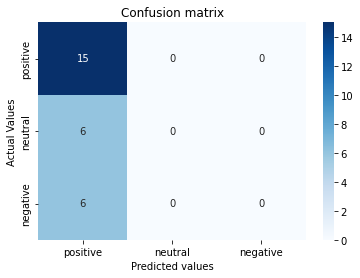

In [69]:
ax = sns.heatmap(cm_svm, annot=True, cmap = 'Blues')
ax.set_title('Confusion matrix')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['positive','neutral','negative'])
ax.yaxis.set_ticklabels(['positive','neutral','negative'])

In [70]:
#Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'C': np.logspace(-3, 2, 6), 'kernel': ['linear']},
  {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6), 'kernel': ['rbf']},
 ]

grid_search = GridSearchCV(svm, param_grid, n_jobs = -1, verbose = 2)
grid_search.fit(tf_x_train, baseline_train["label_body"])

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'kernel': ['linear']},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'kernel': ['rbf']}],
             verbose=2)

In [71]:
print(grid_search.best_params_)

{'C': 1.0, 'kernel': 'linear'}


In [72]:
#Bestes Modell auf Testdaten anwenden und fitted values speichern
model_svm = grid_search.best_estimator_
y_fit_svm = model_svm.predict(tf_x_test)
baseline_test["sentiment_svm"] = y_fit_svm

In [73]:
#ergebnisse /modellgüte
svm_results=classification_report(baseline_test["label_body"], y_fit_svm,output_dict=True)

In [74]:
svm_results

{'-1': {'precision': 0.56,
  'recall': 0.9333333333333333,
  'f1-score': 0.7000000000000001,
  'support': 15},
 '0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6},
 '1': {'precision': 1.0,
  'recall': 0.16666666666666666,
  'f1-score': 0.2857142857142857,
  'support': 6},
 'accuracy': 0.5555555555555556,
 'macro avg': {'precision': 0.52,
  'recall': 0.3666666666666667,
  'f1-score': 0.32857142857142857,
  'support': 27},
 'weighted avg': {'precision': 0.5333333333333333,
  'recall': 0.5555555555555556,
  'f1-score': 0.45238095238095244,
  'support': 27}}

   precision = tp / (tp + fp) </br>
   recall / sensitivity = tp / (tp + fn) </br>
   F1 = 2 * (precision * recall) / (precision + recall)

In [75]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#Base model
rf = RandomForestClassifier(random_state = 42)

In [76]:
#fit base model
rf.fit(tf_x_train, baseline_train["label_body"])

RandomForestClassifier(random_state=42)

In [77]:
#predictions
y_fit_rf_base = rf.predict(tf_x_test)
baseline_test["sentiment_rf"] = y_fit_rf_base

In [78]:
#ergebnisse /modellgüte
rf_results=classification_report(baseline_test["label_body"], y_fit_rf_base,output_dict=True)

C:\Anaconda3\envs\NLPCourse\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\envs\NLPCourse\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\envs\NLPCourse\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ansatz stößt aufgrund der Größe des Datensatzes an seine Grenzen. Ergebnisse nicht wirklich verwendbar.